In [1]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib as mpl 
#mpl.use('pgf')
import matplotlib.pyplot as plt

sys.path.insert(0, '../../icenumerics/')
sys.path.insert(0, './auxnumerics/')

import icenumerics as ice

import auxiliary as aux
import montecarlo_tools as mcb
import chirality_tools as chir
from parameters import params

import concurrent.futures

ureg = ice.ureg
idx = pd.IndexSlice

In [2]:
data_path = '../data/simstair_detailed'

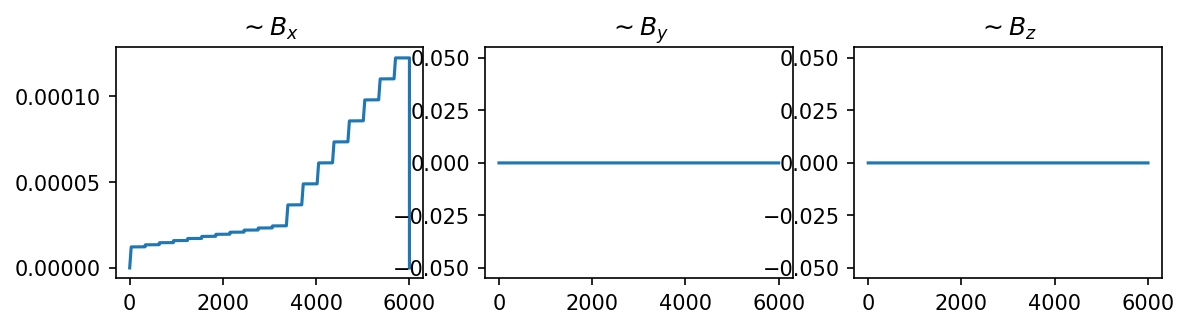

In [4]:
#trj_raw = trj = pd.read_csv(os.path.join(data_path,'1','trj/trj1.csv'), index_col=[0,1])
ctrj_raw = pd.read_csv(os.path.join(data_path,'1','ctrj/ctrj1.csv'), index_col=[0,1])

fig, axes = plt.subplots(1,3,figsize=(9,2),dpi=150)

ax = axes[0]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"mux"]))
ax.set_title("$\\sim B_x$")
#ax.set_xlim(5000,6000+100)

ax = axes[1]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muy"]))
ax.set_title("$\\sim B_y$")

ax = axes[2]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muz"]))
ax.set_title("$\\sim B_z$")

plt.show()

In [11]:
ctrj_raw.loc[idx[60000000-500,:]]

,x,y,z,dx,dy,dz,t,cx,cy,cz,mux,muy,muz
id,,,,,,,,,,,,,
1,4.187010e+00,0.00000,0.0,3.000000e+00,0.0,0.0,5999.95,1.485120,-0.023125,0.0,0.000122,0.0,0.0
2,1.256100e+01,0.00000,0.0,-3.000000e+00,-0.0,-0.0,5999.95,-1.473100,-0.026625,0.0,0.000122,0.0,0.0
3,4.187010e+00,8.37401,0.0,-3.000000e+00,-0.0,-0.0,5999.95,-1.211290,-0.002960,0.0,0.000122,0.0,0.0
4,1.256100e+01,8.37401,0.0,3.000000e+00,0.0,0.0,5999.95,1.245100,0.002620,0.0,0.000122,0.0,0.0
5,2.563800e-16,4.18701,0.0,1.836970e-16,3.0,0.0,5999.95,0.009996,1.532420,0.0,0.000122,0.0,0.0
6,8.374010e+00,4.18701,0.0,1.836970e-16,3.0,0.0,5999.95,0.008580,1.517890,0.0,0.000122,0.0,0.0
7,2.563800e-16,12.56100,0.0,-1.836970e-16,-3.0,-0.0,5999.95,0.008000,-1.525300,0.0,0.000122,0.0,0.0
8,8.374010e+00,12.56100,0.0,1.836970e-16,3.0,0.0,5999.95,-0.008210,1.533800,0.0,0.000122,0.0,0.0
